In [35]:
import pandas as pd
df = pd.read_csv('/content/교통사고 구급출동 현황 17에서 21년 .csv')

<ipython-input-35-70155b1991e7>:2: DtypeWarning: Columns (84,85,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/교통사고 구급출동 현황 17에서 21년 .csv')


In [36]:
# 해당 칼럼에 값이 존재하는 행 제거 = 헬기를 보유하여 헬기가 출동한 경우 우리가 만들려고 하는 모델에 데이터가 왜곡될 수 있으므로 미리 제거함

df = df[df['hlcptr_pmblnc_ennc_nm'].isnull()]

In [37]:
df.shape

(149832, 103)

In [38]:
# 선택하고 싶은 칼럼들을 리스트로 지정
selected_columns = ['relif_reprt_no','trnsport_acdnt_nm','frstt_nm','dclr_ymd','dclr_tm','dclr_hour','season_se_nm','daywk','dsp_ymd','dsp_tm','dsp_hour','spt_arvl_tm','spt_dist','spt_start_tm','hsptl_arvl_tm','hsptl_nm1','hsptl_arvl_time1','hsptl_arvl_hour',
'spt_dist1','retrns_resn1','hsptl_nm2','hsptl_arvl_time2','spt_dist2','retrns_resn2','time_unit_tmprt','time_unit_rainqty','time_unit_ws','time_unit_humidity','time_unit_msnf','time_unit']
 # 선택하고 싶은 칼럼들의 리스트

# 선택한 칼럼들로 새로운 데이터 프레임 생성
df_1 = df[selected_columns]

In [39]:
df_1['신고에서 출동시간(분)'] = (df['dsp_hour']*60 +df['dsp_min'])  - (df['dclr_hour']*60 + df['dclr_min'])
df_1['출동에서 도착시간(분)'] = (df['spt_arvl_hour']*60 +df['spt_arvl_min'])  - (df['dsp_hour']*60 +df['dsp_min'])
df_1['현장에서 병원 도착시간(분)'] = (df['hsptl_arvl_hour']*60 +df['hsptl_arvl_min'])  - (df['spt_arvl_hour']*60 +df['spt_arvl_min'])

<ipython-input-39-e0a83c1b8a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['신고에서 출동시간(분)'] = (df['dsp_hour']*60 +df['dsp_min'])  - (df['dclr_hour']*60 + df['dclr_min'])
<ipython-input-39-e0a83c1b8a54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['출동에서 도착시간(분)'] = (df['spt_arvl_hour']*60 +df['spt_arvl_min'])  - (df['dsp_hour']*60 +df['dsp_min'])
<ipython-input-39-e0a83c1b8a54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [40]:
# 선택하고 싶은 칼럼들을 리스트로 지정
selected_columns2 = ['dsp_hour','hsptl_arvl_hour','season_se_nm','daywk','spt_dist','spt_dist1','신고에서 출동시간(분)','출동에서 도착시간(분)','현장에서 병원 도착시간(분)','time_unit_tmprt','time_unit_ws','time_unit_humidity']
 # 선택하고 싶은 칼럼들의 리스트

# 선택한 칼럼들로 새로운 데이터 프레임 생성
df_2 = df_1[selected_columns2]

In [41]:
df_2.rename(columns={'dsp_hour':'출동시각(h)','hsptl_arvl_hour':'병원도착시각(h)','season_se_nm':'계절','daywk':'요일', 'spt_dist':'현장까지의 거리(km)','spt_dist1':'현장에서 병원간 거리(km)','time_unit_tmprt':'기온(c)','time_unit_ws':'풍속(m/s)'
,'time_unit_humidity':'습도(%)' }, inplace=True)

<ipython-input-41-b8c39a112c80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns={'dsp_hour':'출동시각(h)','hsptl_arvl_hour':'병원도착시각(h)','season_se_nm':'계절','daywk':'요일', 'spt_dist':'현장까지의 거리(km)','spt_dist1':'현장에서 병원간 거리(km)','time_unit_tmprt':'기온(c)','time_unit_ws':'풍속(m/s)'


In [42]:
df_2.head()

,출동시각(h),병원도착시각(h),계절,요일,현장까지의 거리(km),현장에서 병원간 거리(km),신고에서 출동시간(분),출동에서 도착시간(분),현장에서 병원 도착시간(분),기온(c),풍속(m/s),습도(%)
0,0,0.0,겨울,일요일,1.8,6.0,2,5.0,18.0,0.2,2.2,79.0
1,0,1.0,겨울,일요일,1.0,3.0,1,2.0,16.0,0.2,2.2,79.0
2,0,1.0,겨울,일요일,3.7,8.0,2,10.0,23.0,0.2,2.2,79.0
3,0,1.0,겨울,일요일,2.5,2.5,2,9.0,25.0,0.2,2.2,79.0
4,1,1.0,겨울,일요일,1.1,3.0,3,2.0,12.0,0.0,1.4,78.0


In [43]:
missing_values = df_2.isnull().any()
print(missing_values)

출동시각(h)            False
병원도착시각(h)           True
계절                 False
요일                 False
현장까지의 거리(km)       False
현장에서 병원간 거리(km)     True
신고에서 출동시간(분)       False
출동에서 도착시간(분)        True
현장에서 병원 도착시간(분)     True
기온(c)               True
풍속(m/s)             True
습도(%)               True
dtype: bool


In [44]:
df_3 = df_2.dropna(subset=['현장에서 병원간 거리(km)','출동에서 도착시간(분)','현장에서 병원 도착시간(분)','기온(c)','풍속(m/s)','습도(%)'])

In [45]:
df_3.head()

,출동시각(h),병원도착시각(h),계절,요일,현장까지의 거리(km),현장에서 병원간 거리(km),신고에서 출동시간(분),출동에서 도착시간(분),현장에서 병원 도착시간(분),기온(c),풍속(m/s),습도(%)
0,0,0.0,겨울,일요일,1.8,6.0,2,5.0,18.0,0.2,2.2,79.0
1,0,1.0,겨울,일요일,1.0,3.0,1,2.0,16.0,0.2,2.2,79.0
2,0,1.0,겨울,일요일,3.7,8.0,2,10.0,23.0,0.2,2.2,79.0
3,0,1.0,겨울,일요일,2.5,2.5,2,9.0,25.0,0.2,2.2,79.0
4,1,1.0,겨울,일요일,1.1,3.0,3,2.0,12.0,0.0,1.4,78.0


In [46]:
df_3.shape

(140859, 12)

In [47]:
def classify_weekday_weekend(day):
    if day in ['토요일', '일요일']:
        return '주말'
    else:
        return '평일'

df_3['요일'] = df_3['요일'].apply(classify_weekday_weekend)

<ipython-input-47-76fe52c3db06>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['요일'] = df_3['요일'].apply(classify_weekday_weekend)


In [48]:
# 시간을 주간(9시 ~ 18시) 또는 야간(18시 ~ 9시)으로 수정
def classify_day_night(hour):
    if hour >= 9 and hour < 18:
        return '주간'
    else:
        return '야간'

df_3['병원도착시각(h)'] = df_3['병원도착시각(h)'].apply(classify_day_night)


<ipython-input-48-b9794659697a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['병원도착시각(h)'] = df_3['병원도착시각(h)'].apply(classify_day_night)


In [49]:
df_3.head()

,출동시각(h),병원도착시각(h),계절,요일,현장까지의 거리(km),현장에서 병원간 거리(km),신고에서 출동시간(분),출동에서 도착시간(분),현장에서 병원 도착시간(분),기온(c),풍속(m/s),습도(%)
0,0,야간,겨울,주말,1.8,6.0,2,5.0,18.0,0.2,2.2,79.0
1,0,야간,겨울,주말,1.0,3.0,1,2.0,16.0,0.2,2.2,79.0
2,0,야간,겨울,주말,3.7,8.0,2,10.0,23.0,0.2,2.2,79.0
3,0,야간,겨울,주말,2.5,2.5,2,9.0,25.0,0.2,2.2,79.0
4,1,야간,겨울,주말,1.1,3.0,3,2.0,12.0,0.0,1.4,78.0


In [50]:
df_3.shape

(140859, 12)

In [51]:
# 24시를 넘어가는 경우 음수발생
# 음수 값이면 1440을 더하여 수정하는 함수
def fix_negative_value(value):
    if value < 0:
        return value + 1440
    return value

# 특정 칼럼들에 대해 음수 값을 수정하여 새로운 칼럼에 저장
for col in ['신고에서 출동시간(분)', '출동에서 도착시간(분)', '현장에서 병원 도착시간(분)']:
    df_3[f'{col} 수정'] = df_3[col].apply(fix_negative_value)

<ipython-input-51-ca2d4d893197>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[f'{col} 수정'] = df_3[col].apply(fix_negative_value)
<ipython-input-51-ca2d4d893197>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[f'{col} 수정'] = df_3[col].apply(fix_negative_value)
<ipython-input-51-ca2d4d893197>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [52]:
columns_to_remove = ['신고에서 출동시간(분)', '출동에서 도착시간(분)', '현장에서 병원 도착시간(분)']
df_3 = df_3.drop(columns=columns_to_remove)

In [53]:
df_3.rename(columns={'신고에서 출동시간(분) 수정' : '신고에서 출동시간(분)','출동에서 도착시간(분) 수정' :  '출동에서 도착시간(분)' ,'현장에서 병원 도착시간(분) 수정' : '현장에서 병원 도착시간(분)','신고에서 병원 도착시간(분) 수정':'신고에서 병원 도착시간(분)' }, inplace=True)

In [54]:
df_3.head()

,출동시각(h),병원도착시각(h),계절,요일,현장까지의 거리(km),현장에서 병원간 거리(km),기온(c),풍속(m/s),습도(%),신고에서 출동시간(분),출동에서 도착시간(분),현장에서 병원 도착시간(분)
0,0,야간,겨울,주말,1.8,6.0,0.2,2.2,79.0,2,5.0,18.0
1,0,야간,겨울,주말,1.0,3.0,0.2,2.2,79.0,1,2.0,16.0
2,0,야간,겨울,주말,3.7,8.0,0.2,2.2,79.0,2,10.0,23.0
3,0,야간,겨울,주말,2.5,2.5,0.2,2.2,79.0,2,9.0,25.0
4,1,야간,겨울,주말,1.1,3.0,0.0,1.4,78.0,3,2.0,12.0


In [55]:
# 특정 칼럼들에 대한 조건을 충족하지 않는 행 선택
# 새로만든 칼럼의 음수값이 나오는 경우 원본 데이터를 확인해보니 원본데이터가 오류가 존재함
columns_to_check = ['신고에서 출동시간(분)', '출동에서 도착시간(분)','현장에서 병원 도착시간(분)']  # 조건을 확인할 칼럼들
for column in columns_to_check:
    df_3 = df_3[df_3[column] <= 1000]


In [56]:
df_3.shape

(140689, 12)

In [57]:
# 인덱스 재설정
df_3 = df_3.reset_index(drop=True)

In [58]:
# 범주형 데이터 처리

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

categorical_columns = ['병원도착시각(h)',	'계절'	,'요일']
enc.fit(df_3[categorical_columns])

categorical_df = df_3.copy()
categorical_df[categorical_columns] = enc.transform(df_3[categorical_columns])
categorical_df.head()

,출동시각(h),병원도착시각(h),계절,요일,현장까지의 거리(km),현장에서 병원간 거리(km),기온(c),풍속(m/s),습도(%),신고에서 출동시간(분),출동에서 도착시간(분),현장에서 병원 도착시간(분)
0,0,0.0,1.0,0.0,1.8,6.0,0.2,2.2,79.0,2,5.0,18.0
1,0,0.0,1.0,0.0,1.0,3.0,0.2,2.2,79.0,1,2.0,16.0
2,0,0.0,1.0,0.0,3.7,8.0,0.2,2.2,79.0,2,10.0,23.0
3,0,0.0,1.0,0.0,2.5,2.5,0.2,2.2,79.0,2,9.0,25.0
4,1,0.0,1.0,0.0,1.1,3.0,0.0,1.4,78.0,3,2.0,12.0


In [59]:
import pandas as pd
import numpy as np

# Upper fence와 IQR 계산
def calculate_upper_fence(column):
    Q3 = column.quantile(0.75)
    Q1 = column.quantile(0.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    return upper_fence

# 이상치 대체 함수
def replace_upper_fence_outliers(column):
    upper_fence = calculate_upper_fence(column)
    column_copy = column.copy()
    column_copy[column > upper_fence] = upper_fence
    return column_copy

# 대체할 칼럼들 리스트 생성
columns_to_replace = ['현장까지의 거리(km)','신고에서 출동시간(분)','출동에서 도착시간(분)','현장에서 병원간 거리(km)'
,'현장에서 병원 도착시간(분)']

# 대체 수행
for column_name in columns_to_replace:
    categorical_df[column_name] = replace_upper_fence_outliers(categorical_df[column_name])

In [60]:
X = categorical_df.drop(['현장에서 병원 도착시간(분)'], axis = 1)
y = categorical_df['현장에서 병원 도착시간(분)'].values.reshape(-1,1)
print (X.shape)
print (y.shape)

(140689, 11)
(140689, 1)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)
print(X_train.shape)
print(X_test.shape)

(112551, 11)
(28138, 11)


In [62]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
scaled_X_train = scaler_X.fit_transform(X_train)
scaled_X_test = scaler_X.fit_transform(X_test)
scaled_y_train = scaler_y.fit_transform(y_train)
scaled_y_test = scaler_y.fit_transform(y_test)

In [63]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선택
model = LinearRegression()

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 모델 훈련
model.fit(X_train, y_train)


LinearRegression()

In [64]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 40.11601776691269
MAE: 4.892713599450402
R^2: 0.3171469362600885


In [66]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [67]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import numpy as np

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

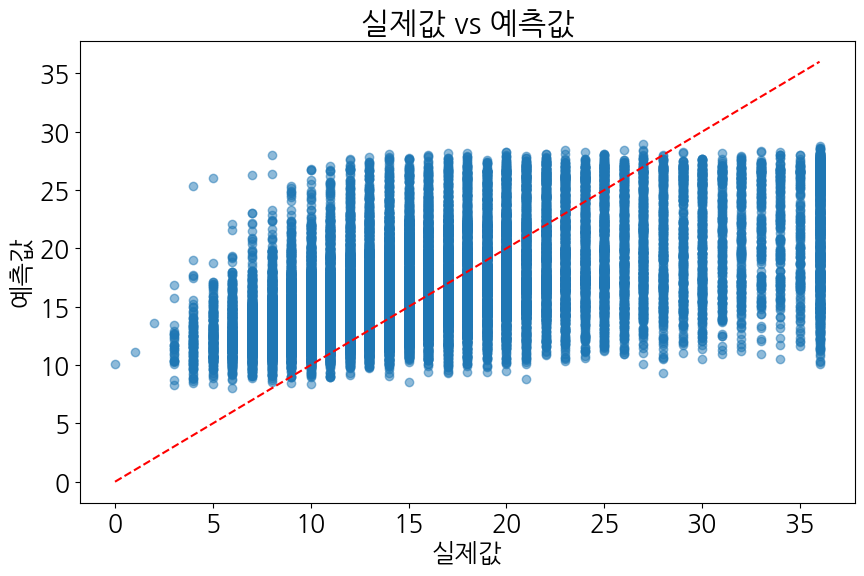

In [68]:
import matplotlib.pyplot as plt

# 예측값과 실제값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # 실제값 vs 예측값
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 대각선 (일치하는 경우)
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값 vs 예측값")
plt.show()

### 랜덤 포레스트

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
model = RandomForestRegressor(n_estimators=30,  # 트리 개수
                               max_depth=4,  # 트리의 최대 깊이
                               random_state=42,
                               verbose=1)  # 출력 정보 설정

# 모델 훈련
model.fit(X_train, y_train)

# 검증셋에 대한 예측
y_pred = model.predict(X_test)

# 평가 (MSE 계산)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

<ipython-input-71-fa1e3c872fcd>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error: 40.314397754611505
R^2 Score: 0.3137701209647141


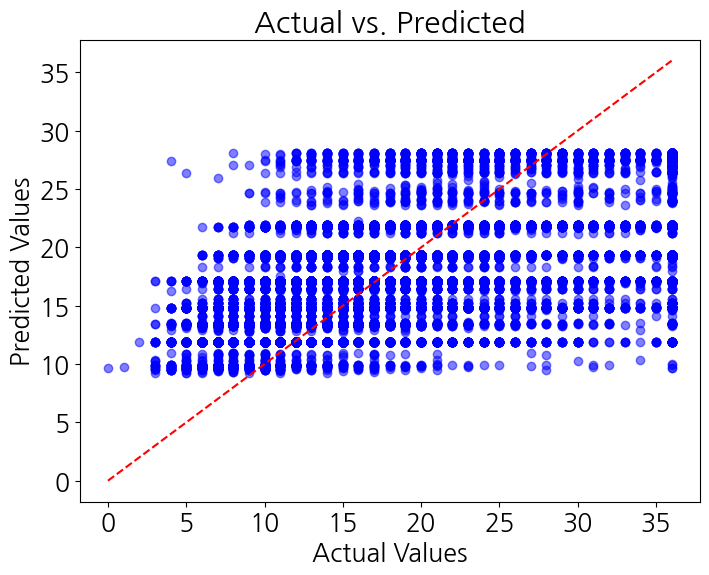

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # 산점도 그래프

# 선형으로 예측값과 실제값이 일치하는 대각선 추가
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### 캣부스트

In [76]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.7 MB/s eta 0:00:00


In [77]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 준비
# df_4: 데이터프레임이 이미 준비되어 있다고 가정

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 캣부스트 회귀 모델 생성
model = CatBoostRegressor(iterations=100,  # 반복 횟수
                          depth=6,  # 트리 깊이
                          learning_rate=0.2,  # 학습률
                          loss_function='RMSE',  # 손실 함수
                          verbose=100,  # 출력 정보 설정
                          random_seed=42)  # 랜덤 시드

# 모델 훈련
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

# 예측
y_pred = model.predict(X_test)

# 평가 (MSE 및 R^2 계산)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

0:	learn: 7.2531932	test: 7.2342692	best: 7.2342692 (0)	total: 95.3ms	remaining: 9.43s
99:	learn: 6.1971458	test: 6.2444194	best: 6.2444194 (99)	total: 3.08s	remaining: 0us

bestTest = 6.244419394
bestIteration = 99

Mean Squared Error: 38.99277356590213
R^2 Score: 0.3362667489106048


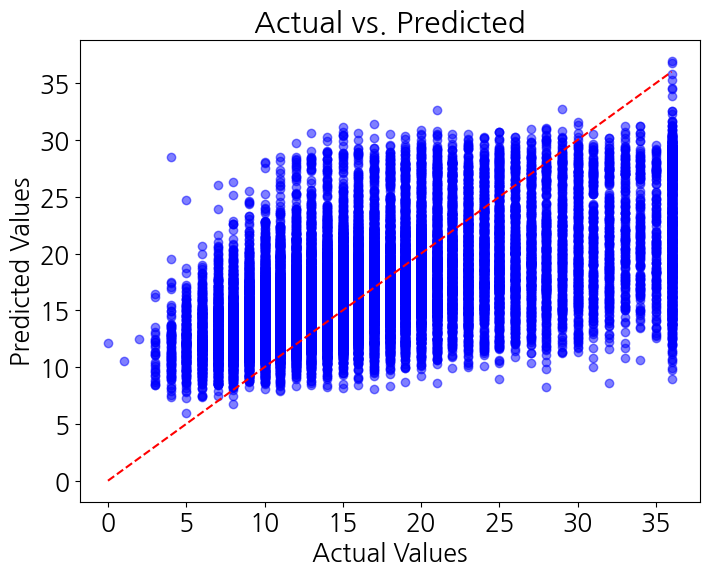

Mean Squared Error: 38.99277356590213
R^2 Score: 0.3362667489106048


In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # 산점도 그래프

# 선형으로 예측값과 실제값이 일치하는 대각선 추가
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 평가 (MSE 및 R^2 계산)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)







# ANN 회귀분석

In [83]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping


In [92]:
def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=11),
        layers.Dropout(0.2),  # Adding dropout with a rate of 0.2
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),  # Adding dropout with a rate of 0.2
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),  # Adding dropout with a rate of 0.2
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

# Load and preprocess your data here

model = build_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [94]:


# Train the model with early stopping
history = model.fit(scaled_X_train, scaled_y_train,
                    epochs=100,
                    batch_size=12,
                    validation_split = 0.2,callbacks=[early_stopping])



Epoch 1/100
7504/7504 [==============================] - 37s 5ms/step - loss: 0.7175 - mae: 0.6544 - mse: 0.7175 - val_loss: 0.6903 - val_mae: 0.6280 - val_mse: 0.6903
Epoch 2/100
7504/7504 [==============================] - 33s 4ms/step - loss: 0.7031 - mae: 0.6475 - mse: 0.7031 - val_loss: 0.6847 - val_mae: 0.6260 - val_mse: 0.6848
Epoch 3/100
7504/7504 [==============================] - 35s 5ms/step - loss: 0.7016 - mae: 0.6470 - mse: 0.7016 - val_loss: 0.6797 - val_mae: 0.6269 - val_mse: 0.6797
Epoch 4/100
7504/7504 [==============================] - 33s 4ms/step - loss: 0.6994 - mae: 0.6461 - mse: 0.6994 - val_loss: 0.6788 - val_mae: 0.6404 - val_mse: 0.6788
Epoch 5/100
7504/7504 [==============================] - 37s 5ms/step - loss: 0.6995 - mae: 0.6459 - mse: 0.6995 - val_loss: 0.6840 - val_mae: 0.6508 - val_mse: 0.6840
Epoch 6/100
7504/7504 [==============================] - 33s 4ms/step - loss: 0.6995 - mae: 0.6456 - mse: 0.6995 - val_loss: 0.6820 - val_mae: 0.6280 - val_mse:

In [96]:
scaled_y_pred = model.predict(scaled_X_test)
mse = mean_squared_error(scaled_y_test, scaled_y_pred)
r2 = r2_score(scaled_y_test, scaled_y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

880/880 [==============================] - 3s 3ms/step
Mean Squared Error: 0.6787744286633379
R^2 Score: 0.3212255713366621


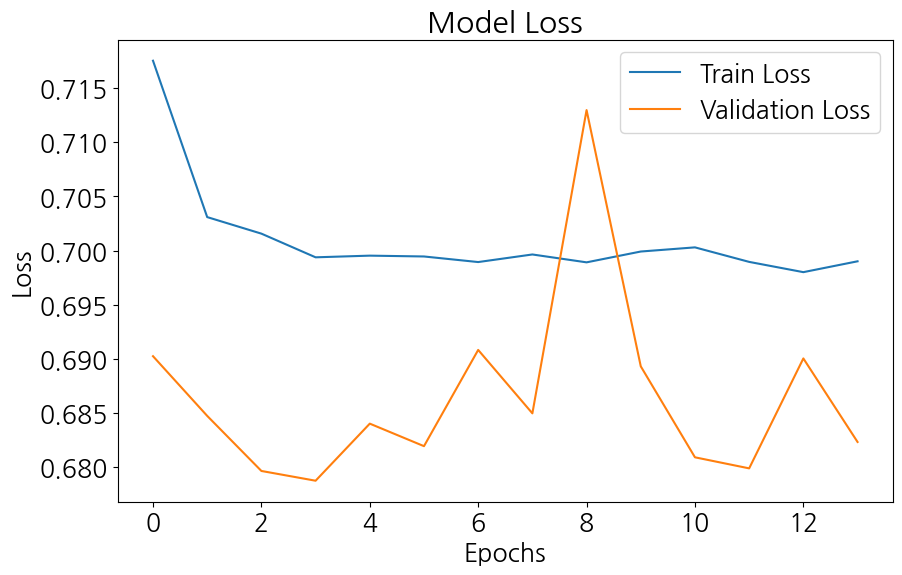

880/880 [==============================] - 3s 3ms/step
Mean Squared Error: 0.6787744286633379
R^2 Score: 0.3212255713366621


In [97]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
scaled_y_pred = model.predict(scaled_X_test)
mse = mean_squared_error(scaled_y_test, scaled_y_pred)
r2 = r2_score(scaled_y_test, scaled_y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

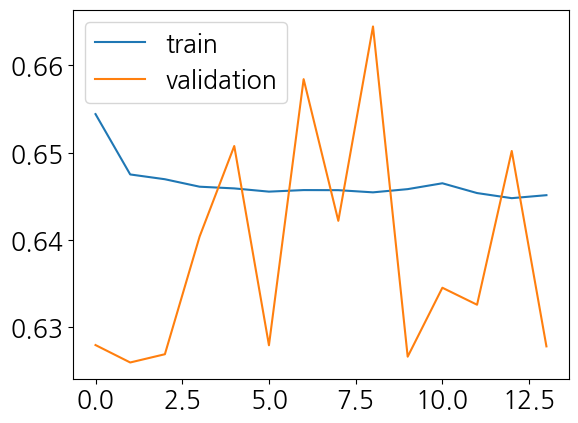

In [99]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label = 'train')
plt.plot(history.history['val_mae'], label = 'validation')
plt.legend()